In [1]:
import create_model_individual as create_model
import time
import numpy as np
# Change simulation parameters here
temperature = 25  # in degC, valid values: 0, 10, 25
crate = 1         # valid values: 0.5, 1, 2
cell_selected = ["789"]   # select the cell to optimize
model=create_model.model_build(temperature, crate, cell_selected)

In [2]:
from scipy import optimize
x0 =np.array([5e-14,6.48e-7,20,2.85e3,2.85e3,2.85e3,2.85e3,2.85e3]) # Initial values of parameters
# Create bounds
#max_bound = np.array([ 2.06e-12, 2.18589831e-5,1000,2.85e6])
#min_bound = np.array([ 2.06e-16, 2.18589831e-9,0.1,2.85])

#bounds of the variables as (min,max) {This might need adjustment according to the optimization method.}
bounds = [(2.06e-16,2.06e-12),(2.18589831e-9,2.18589831e-5),(0.1,1000),(2.85, 2.85e6),(2.85, 2.85e6),(2.85, 2.85e6),(2.85, 2.85e6),(2.85, 2.85e6)] 


#model.fitness(x0) #initial value of the function

In [3]:
start = time.process_time()
print('Optimisation Starting Time:', start)
from scipy import optimize
minimum = optimize.differential_evolution(model.fitness, bounds, x0=x0, workers=-1, updating='deferred')
end = time.process_time()
print('Optimisation End Time:', end)
print('Total Duration:', end-start)

Optimisation Starting Time: 6.640625


2022-07-07 16:20:47,849 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:47,876 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:49,483 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:49,511 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:50,126 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:50,152 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:50,764 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:50,791 - pybamm.logger - WARNING - Calling variable outside interpolation range (returns 'nan')
2022-07-07 16:20:51,409 - pybamm.logger - WARNING - Calling variable outside interpolation range

Optimisation End Time: 742.0
Total Duration: 735.359375


Initial function value: 0.015479220866349935
Optimized function value: 0.0012471753706255863
Optimized values are: [1.79213918e-14 3.04723806e-07 3.51710754e+01 7.61303124e+03
 1.08974925e+03 1.99458113e+03 6.72716054e+04 1.74944658e+02]


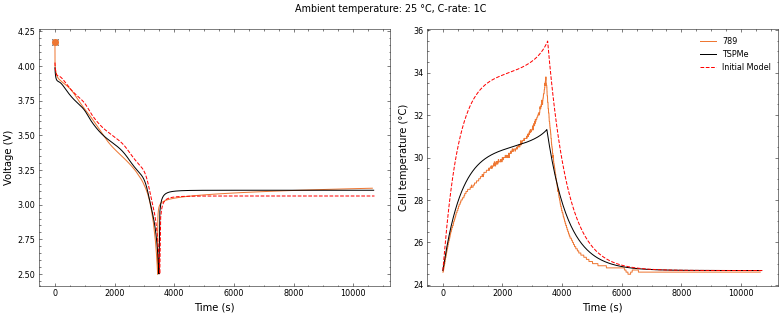

In [5]:
print("Initial function value: %s" %model.fitness(x0))
print("Optimized function value: %s" %model.fitness(minimum.x))
print("Optimized values are: %s" %minimum.x)
model.define_model(minimum.x)
model.model_plot()